# Metropolis Hastings Algorithm

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
import math

In [23]:
df = pd.read_csv('airconditioner.csv')
df

,Week,air conditioner: (Worldwide)
0,2010-01-03,12
1,2010-01-10,13
2,2010-01-17,12
3,2010-01-24,11
4,2010-01-31,11
...,...,...
517,2019-12-01,16
518,2019-12-08,16
519,2019-12-15,18
520,2019-12-22,16


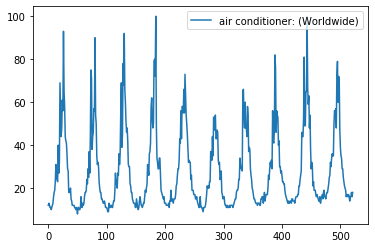

In [24]:
df = df.drop(['Week'], axis=1)
df.plot()

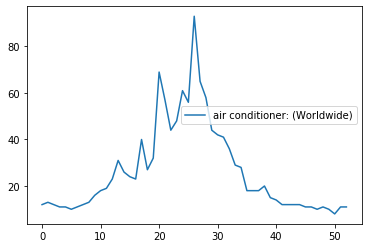

In [25]:
one_year = df.head(53)
one_year.plot()

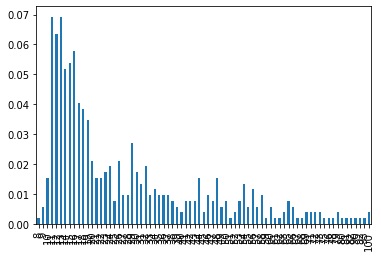

In [44]:
# gamma distribution
freq_all_years = df['air conditioner: (Worldwide)'].value_counts()
freq_all_years = freq_all_years.sort_index()
freq_all_years = freq_all_years/520
freq_all_years.plot(kind = 'bar')


In [45]:
#Markov chain part
def proposal_distribution(params): 
    return np.random.normal(params,[5,0.05],(2,))

def prior(params):
    # alpha and beta should be greater than zero
    if(params[0]<=0 or params[1] <=0):
        return 0
    else:
        return 1
    
def equation_log_likelihood_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_likelihood_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data))) 


def transition_density_ratio(x,y):
    q = (1/math.sqrt(2 * math.pi)) * (0.5 * ((y - x)**2))
    q1 = (1/math.sqrt(2 * math.pi)) * (0.5 * ((x - y)**2))
    return (np.log(q) - np.log(q1))


#Defines whether to accept or reject the new sample
def accept(x, y):
    Q = transition_density_ratio(x.item(),y.item())
#     print('Acceptance:',x, x_new)
    if ((y.item() + Q)>x.item()):
        return True
    else:
        if ((np.exp(y.item() - x.item()+ Q)) > (np.random.uniform(0,1))):
            return True
        else:
            return False

def metropolis_hastings(prior, params_init,iterations,data):
    params = params_init
    
    accepted = []
    
    for i in range(iterations):
        
        params_new =  proposal_distribution(params)    
        
        l_likelihood = equation_log_likelihood_gamma(params,data)
        
        new_l_likelihood = equation_log_likelihood_gamma(params_new,data) 
        
#         print(accept(l_likelihood + np.log(prior(params)), new_l_likelihood + np.log(prior(params_new))))
        
        if (accept(l_likelihood + np.log(prior(params)), new_l_likelihood + np.log(prior(params_new)))):            
            
            accepted.append(params_new)
            
            params = params_new
#             print("---",params)            
                
    return np.array(accepted)

In [51]:
data_initial = df.loc[np.random.randint(0, 520, 100)]
# data_initial = df


accepted = metropolis_hastings(prior,[4, 10], 50000,data_initial)


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [52]:
print(accepted)
print(accepted.size)

[[ 1.9728047  10.07824444]
 [ 2.38423108  9.96001026]
 [ 3.45301531  9.96296143]
 ...
 [ 2.5101585  10.87998064]
 [ 2.54169    10.8494731 ]
 [ 2.57197804 10.90562777]]
3808


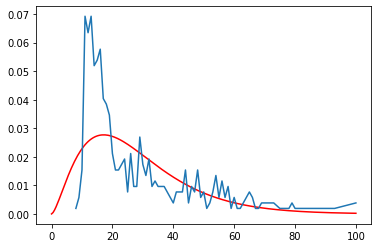

In [53]:
x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=accepted[-1][0], scale=accepted[-1][1])
plt.plot(x, y1,color = 'r')
plt.plot(freq_all_years)
plt.show()